In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
from datetime import timedelta
from matplotlib.dates import DateFormatter

In [2]:
%ls

CustomerAddress_cleaned.csv
CustomerDemo_cleaned.csv
KPMG Task 1 - Customer Address .ipynb
KPMG Task 1 - Customer Demographic Table.ipynb
KPMG Task 1 - New Customers Table.ipynb
KPMG Task 1 - Transactions Table.ipynb
KPMG Task 1 Sample ANS .docx
KPMG Task 1.docx
KPMG Task 2.ipynb
KPMG_VI_New_raw_data_update_final.xlsx
Module_2_Template_slide.pptx
Transactions_cleaned.csv
~$KPMG_VI_New_raw_data_update_final.xlsx


In [3]:
# Import Raw Data
data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [4]:
# Seperate Data by Sheets
NewCustomer = pd.read_excel(data, 'NewCustomerList')


In [5]:
new_header = NewCustomer.iloc[0]
NewCustomer.columns = new_header

# We Noticed there are Columns with NaN names 
# Drop these columns
NewCustomer = NewCustomer.loc[1:, NewCustomer.columns.notna()]

In [6]:
NewCustomer.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875


In [7]:
NewCustomer.shape

(1000, 18)

In [8]:
NewCustomer.describe()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,23,1000,522,3,1,16,324,324.0000
top,Rozamond,Sissel,Female,60,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,9,45 Shopko Center,2145,NSW,Australia,9,760,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,79,1,9,506,1000,173,13,13.0000


In [9]:
NewCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [10]:
# Count Duplicated Items
NewCustomer.duplicated().sum()

0

In [11]:
# Count Unique Number of Items
NewCustomer.nunique() 

0
first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       16
Rank                                    324
Value                                   324
dtype: int64

In [12]:
# Check for Missing Values for each Column
NewCustomer.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [13]:
index = ['gender', 'DOB', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

for item in index:
    print(NewCustomer[item].value_counts())
    print('\n')

Female    513
Male      470
U          17
Name: gender, dtype: int64


1965-07-03    2
1978-01-15    2
1979-07-28    2
1995-08-13    2
1941-07-21    2
             ..
1978-05-27    1
1945-08-08    1
1943-08-27    1
1999-10-24    1
1955-10-02    1
Name: DOB, Length: 961, dtype: int64


Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64


Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64


N    1000
Name: deceased_indicator, dtype: int64


No     507
Yes    493
Name: owns_car, dtype: int64


NSW    506
VIC    266
QLD    228
Name: state, dtype: int64




In [14]:
NewCustomer = NewCustomer.dropna()

In [15]:
# Create Age Column for Further Analysis

# Convert DOB to DateTime Format
NewCustomer['DOB'] = pd.to_datetime(NewCustomer['DOB'])
NewCustomer['age'] = (datetime.now() - NewCustomer['DOB']) / np.timedelta64(1, 'Y')
NewCustomer['age_group'] = ((round(NewCustomer['age'] / 10)) * 10).astype(int)

In [16]:
NewCustomer.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,65.555789,70
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,52.862852,50
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,48.427443,50


<AxesSubplot:xlabel='age_group'>

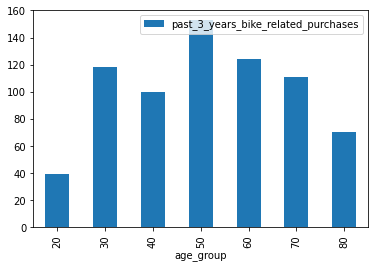

In [20]:
NewCustomer.groupby('age_group').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='job_industry_category'>

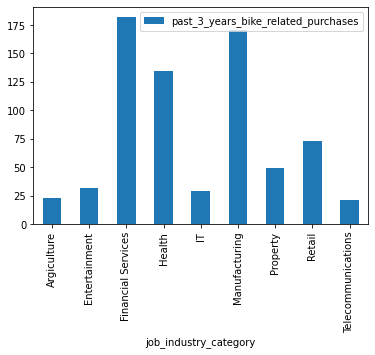

In [18]:
NewCustomer.groupby('job_industry_category').agg('past_3_years_bike_related_purchases').count() \
    .to_frame().plot(kind='bar')

<AxesSubplot:xlabel='job_industry_category'>

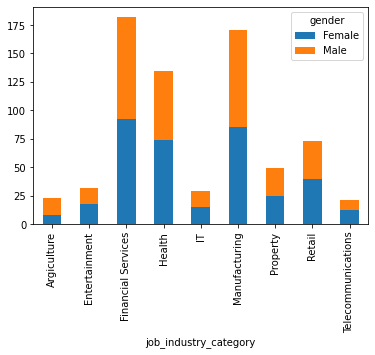

In [27]:
NewCustomer.groupby('job_industry_category')['gender'].value_counts().unstack(level=1).plot.bar(stacked=True)

<AxesSubplot:xlabel='wealth_segment'>

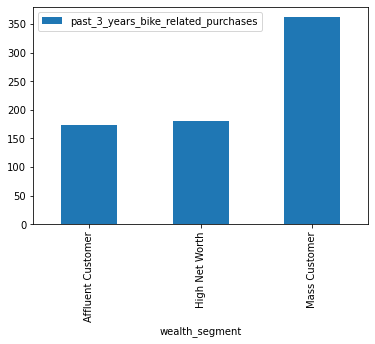

In [21]:
NewCustomer.groupby('wealth_segment').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='owns_car'>

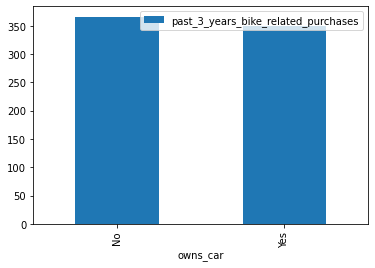

In [22]:
NewCustomer.groupby('owns_car').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='state'>

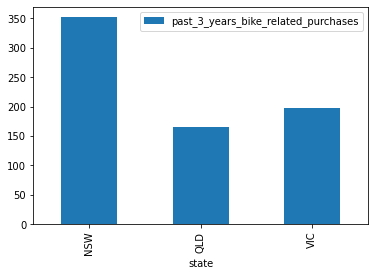

In [23]:
NewCustomer.groupby('state').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

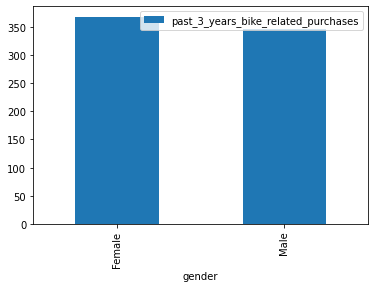

In [24]:
NewCustomer.groupby('gender').agg('past_3_years_bike_related_purchases').count().to_frame().plot(kind='bar')